# Company position versus salary ( Polynomial Regression)

## Importing libraries and importing data 

In [2]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv("C:\\Users\\Naira\\Desktop\\web pages\\Position_Salaries.csv")

In [4]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
data.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [8]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Data Visualisation 

<AxesSubplot:xlabel='Level', ylabel='Salary'>

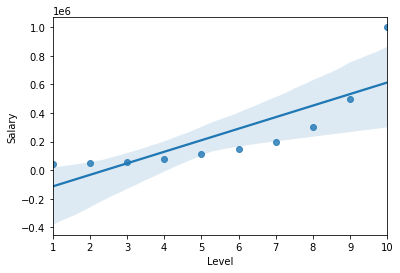

In [9]:
sns.regplot(x='Level',y='Salary',data=data)

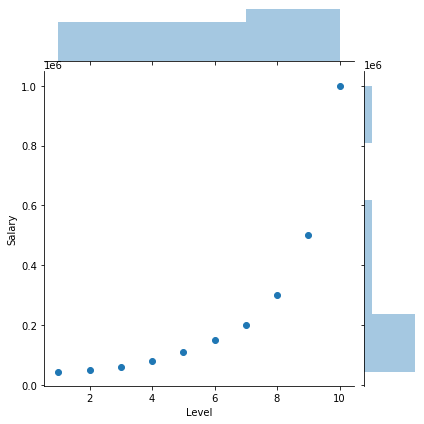

In [10]:
sns.jointplot(x='Level',y='Salary',data=data)

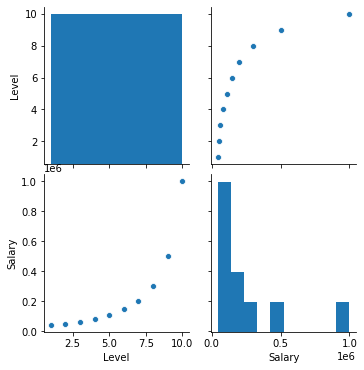

In [11]:
sns.pairplot(data)

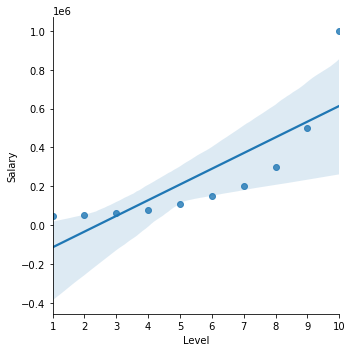

In [12]:
sns.lmplot(x='Level',y='Salary',data=data)

## Spliting the Data 

In [13]:
x=data['Level']
y=data['Salary']

In [14]:
x=nm.array(x).reshape(-1,1)
y=nm.array(y).reshape(-1,1)

## Preparing the Polynomial Model 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly_regressor=PolynomialFeatures(degree=4)

In [17]:
x_poly=poly_regressor.fit_transform(x)

In [18]:
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [19]:
lm=LinearRegression()

In [20]:
lm.fit(x_poly,y)

LinearRegression()

In [21]:
print("Coefficients : ",lm.coef_,lm.intercept_)

Coefficients :  [[      0.         -211002.33100293   94765.44289064  -15463.28671331
      890.15151515]] [184166.66666729]


## Testing the model

In [22]:
y_pred=lm.predict(x_poly)

Text(0.5, 1.0, 'Level vs Salary graph (polynomial order = 4)')

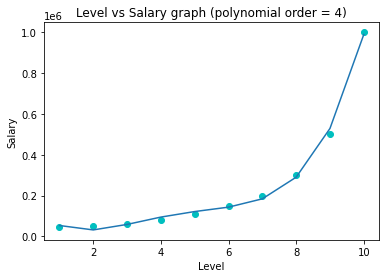

In [23]:
plt.scatter(x,y,color='c')
plt.plot(x,y_pred)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Level vs Salary graph (polynomial order = 4)")

## Predicting Salaries 

In [24]:
lev1=data[data['Level']==6]
lev1

,Position,Level,Salary
5,Region Manager,6,150000


In [25]:
lev1_pred=nm.array(6).reshape(-1,1)
lm.predict(poly_regressor.fit_transform(lev1_pred))

array([[143275.05827514]])

In [26]:
lm.score(x_poly,y)

0.9973922891706611